# Описание проекта

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Графики" data-toc-modified-id="Графики-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Графики</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов" data-toc-modified-id="Модели-самолетов-и-количество-рейсов-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов</a></span></li><li><span><a href="#Города-и-количество-рейсов" data-toc-modified-id="Города-и-количество-рейсов-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Города и количество рейсов</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов" data-toc-modified-id="Топ-10-городов-и-количество-рейсов-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов</a></span></li></ul></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Общая информация о данных

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df_model = pd.read_csv('/datasets/query_1.csv')
df_model

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


- **model** — модели самолета
- **flights_amount** — количество рейсов для каждой модели самолетов model в сентябре 2018 года

In [19]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [20]:
df_city = pd.read_csv('/datasets/query_3.csv')
df_city.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


- **city** — города
- **average_flights** — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [21]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


**Вывод**

1. Пропуски в данных отсутсвтуют
2. Типы данных менять не нужно
Данные в полном порядке.

## Исследовательский анализ данных

### Топ-10 городов по количеству рейсов

In [22]:
top10_city = df_city.sort_values(by='average_flights', ascending=False).head(10)
top10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


### Графики

#### Модели самолетов и количество рейсов

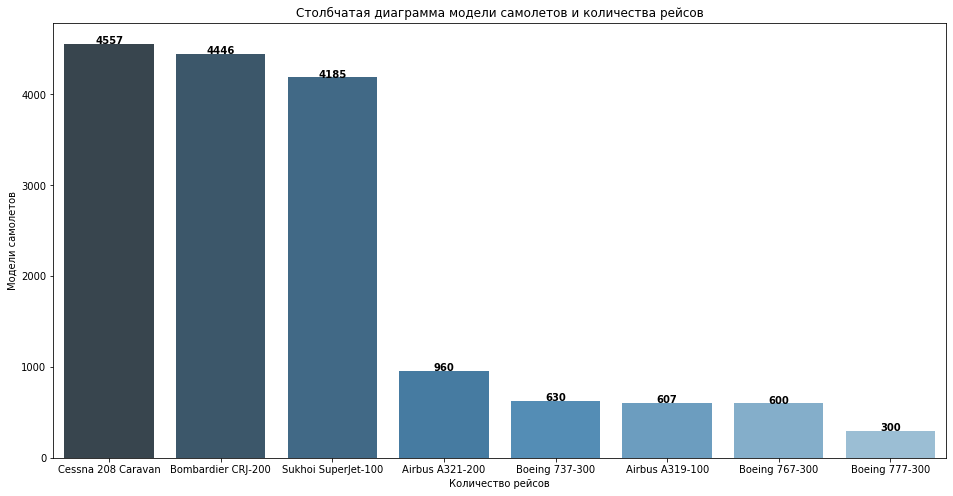

In [23]:
df_model.sort_values(by = 'flights_amount', inplace = True, ascending = False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x = 'model', y = 'flights_amount', data = df_model, palette="Blues_d")
plt.title('Столбчатая диаграмма модели самолетов и количества рейсов')
plt.ylabel('Модели самолетов')
plt.xlabel('Количество рейсов')
for i, fl in enumerate(df_model['flights_amount']):
    ax.text(i, fl, str(fl), color='black', 
            ha='center', fontweight='bold')
plt.show()

Тройка самых летаемых самолетов это: 
1. Cessna 208 Caravan
2. Bombardier CRJ-200
3. Sukhoi SuperJet-100

На данный момент суперджеты Сухого вряд ли будут в тройке после пожаров данных самолетов и постоянных неполадок самолетов.

####  Города и количество рейсов

In [24]:
df_city.sort_values(by = 'average_flights', ascending = False, inplace = True)

def citybar(df, a, b):
    plt.figure(figsize=(a,b))
    ax = sns.barplot(y = 'city', x = 'average_flights', data = df, palette = 'vlag')
    plt.xlabel('Среднее количество рейсов')
    plt.ylabel('')
    plt.title('Количество рейсов по городам')
    for i, fl in enumerate(df['average_flights']):
         ax.text(fl, i, int(fl), color='black', 
                 ha='center', va = 'center', fontweight='heavy')
    plt.show()

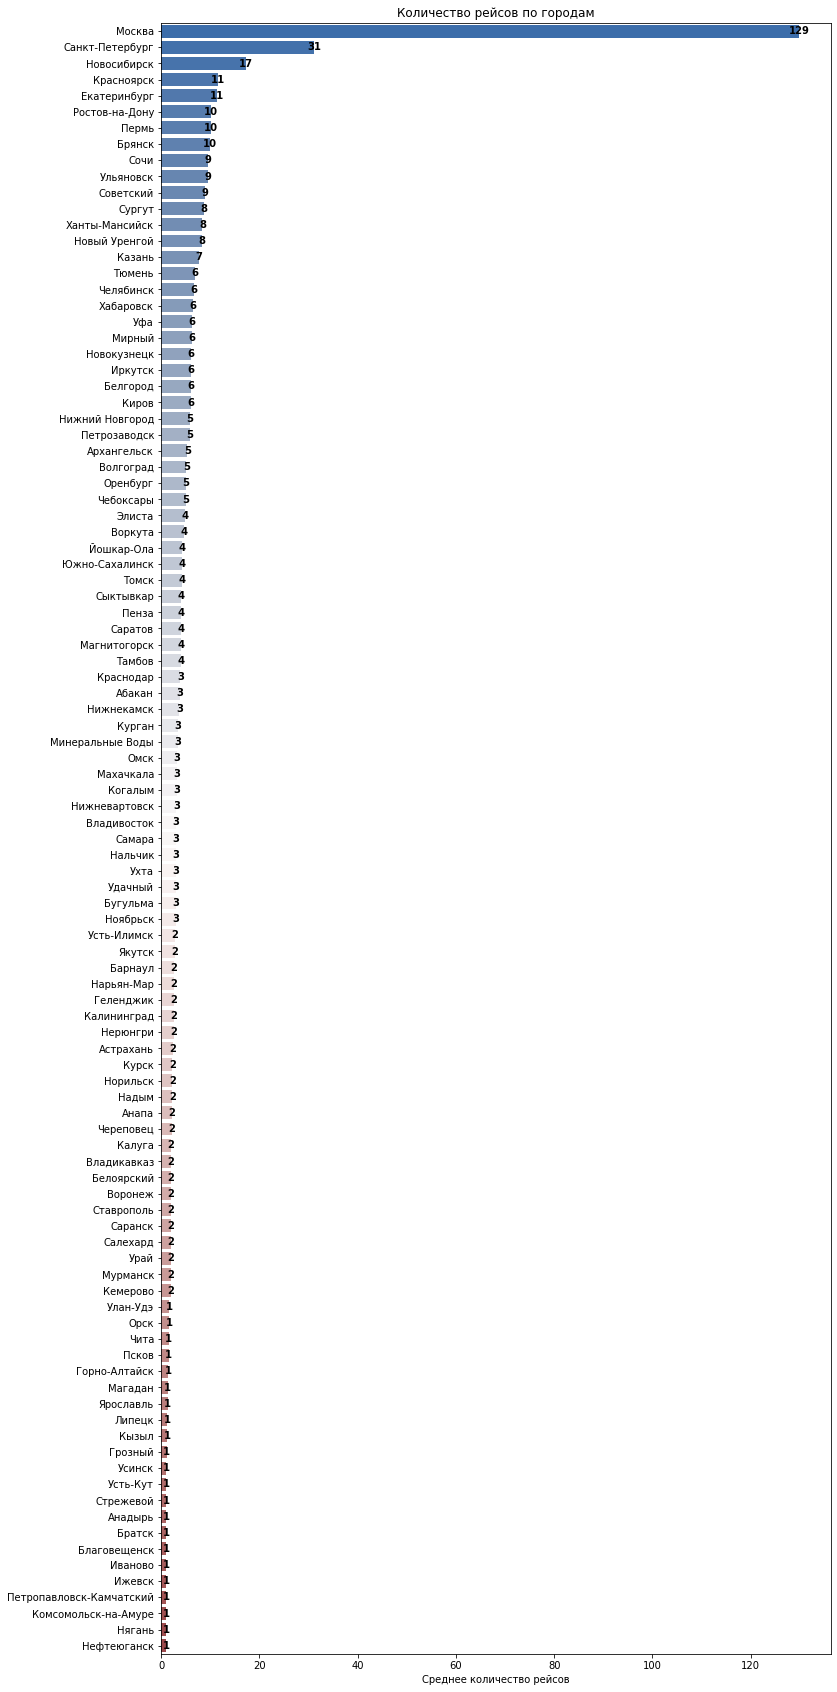

In [25]:
citybar(df_city, 12, 30)

Первые три места занимают три столицы: столица России, культурная столица и столица Сибири.(Москва, Питер, Новосиб)

#### Топ-10 городов и количество рейсов

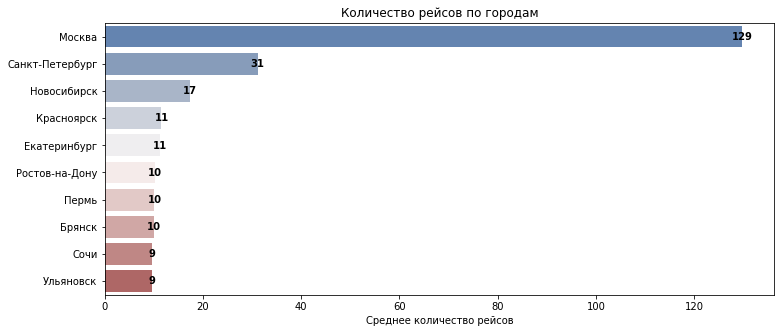

In [26]:
citybar(top10_city, 12, 5)

Удивительным образом в топ 10 попали Брянск и Ульяновск, ожидалось, что будут города миллионники.(Сочи исключение - большой пассажиропоток). Возможно билеты через эти города были дешевыми. 

## Вывод

В ходе выполнения проекта были изучены данные с моделями самолетов и количеством полетов на них, среднее количество рейсов по городам, для них построены соответствующие столбчатые диаграммы. Были выделены топ 10 городов, по которым также построена столбчатая диаграмма.

- Самолеты Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 чаще всего летали в сентябре 2018 года
- Чаще всего прилетали в Москву, Санкт-Петербург и Новосибирск
